<a href="https://colab.research.google.com/github/khairul1036/Caries-Classification-Deep-Learning/blob/main/Caries_Classification_inceptionV3_MobileNet_ResNet50_VGG16_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [3]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image


In [3]:
# !pip install split-folders
# import splitfolders
# import os
# input_folder="/content/drive/MyDrive/Research/tulip_sakilSir/Caries_Dataset"
# output="/content/drive/MyDrive/Research/tulip_sakilSir/output"
# splitfolders.ratio(input_folder, output, seed=42, ratio=(.75,.10,.15)) ### train 75%, val 10%, test 15%

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [5]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Research/tulip_sakilSir/output/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Research/tulip_sakilSir/output/val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Research/tulip_sakilSir/output/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 1500 images belonging to 3 classes.
Found 200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# **InceptionV3**

In [6]:
InceptionV3 = tf.keras.applications.InceptionV3(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

In [7]:
InceptionV3.trainable = False

In [8]:
model = tf.keras.models.Sequential([
  InceptionV3,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1024)              52429824  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 3)                 3

In [10]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
47/47 [==============================] - 296s 6s/step - loss: 4.8073 - accuracy: 0.5613 - val_loss: 0.8163 - val_accuracy: 0.7800
Epoch 2/10
47/47 [==============================] - 25s 523ms/step - loss: 1.2900 - accuracy: 0.7240 - val_loss: 1.5456 - val_accuracy: 0.5950
Epoch 3/10
47/47 [==============================] - 26s 549ms/step - loss: 0.5045 - accuracy: 0.8260 - val_loss: 0.4572 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 24s 506ms/step - loss: 0.4823 - accuracy: 0.8293 - val_loss: 0.3890 - val_accuracy: 0.8500
Epoch 5/10
47/47 [==============================] - 25s 529ms/step - loss: 0.3612 - accuracy: 0.8507 - val_loss: 0.3789 - val_accuracy: 0.8300
Epoch 6/10
47/47 [==============================] - 25s 538ms/step - loss: 0.3191 - accuracy: 0.8780 - val_loss: 0.4610 - val_accuracy: 0.8400
Epoch 7/10
47/47 [==============================] - 25s 534ms/step - loss: 0.3476 - accuracy: 0.8713 - val_loss: 0.2715 - val_accuracy: 0.9050
E

In [11]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

10/10 [==============================] - 99s 11s/step - loss: 0.3803 - accuracy: 0.8367
Accuracy: 0.8366666436195374
Loss: 0.3802541494369507


In [12]:
class_dictionary = test.class_indices
class_dictionary

{'AdvanceEnamel_Caries': 0, 'EarlyStageEnamel_Caries': 1, 'NoEnamel_Caries': 2}

In [13]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

10/10 [==============================] - 4s 151ms/step
                         precision    recall  f1-score   support

   AdvanceEnamel_Caries       0.76      0.97      0.85       120
EarlyStageEnamel_Caries       0.94      0.67      0.78       120
        NoEnamel_Caries       0.89      0.92      0.90        60

               accuracy                           0.84       300
              macro avg       0.86      0.85      0.84       300
           weighted avg       0.86      0.84      0.83       300



<Axes: >

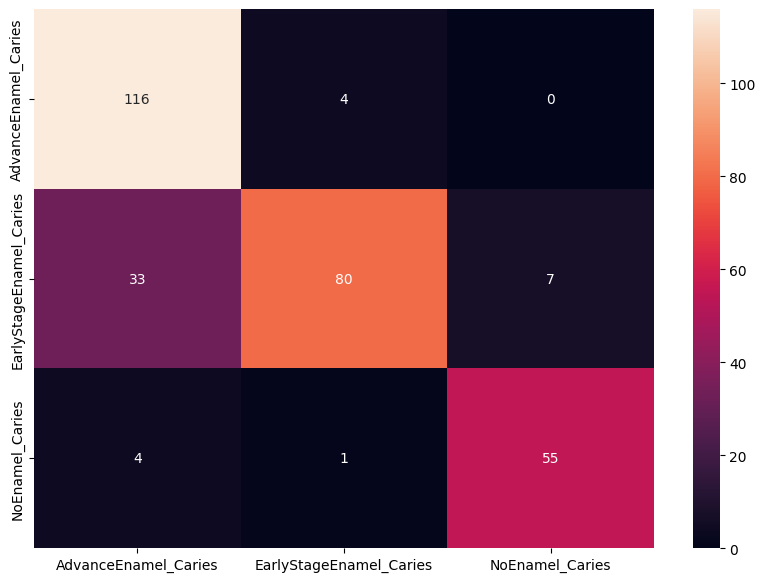

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']],
                  columns = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

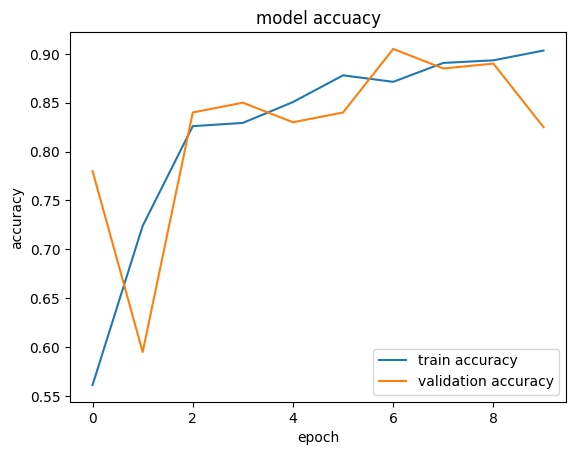

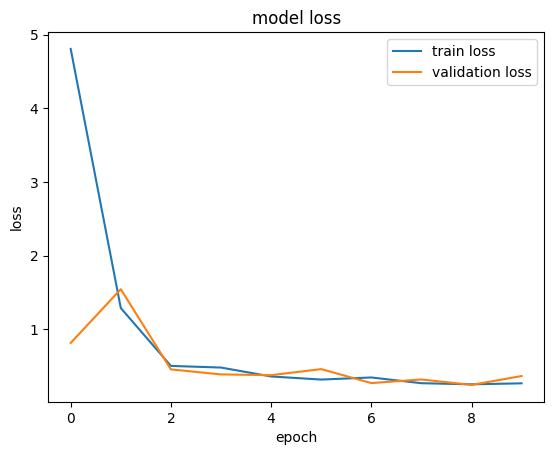

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

In [ ]:
# Testing

import pandas as pd
import keras.utils as image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

IMAGE_SIZE = (224, 224)

#print(data)
#print("Class name to class id map\n",class_dictionary)

#Choose a random image
path="../content/machli.jpg"

test_image = image.load_img(path,target_size =IMAGE_SIZE )
test_image = image.img_to_array(test_image)

plt.imshow(test_image/255.)

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)

prediction = model.predict(test_image)
df = pd.DataFrame({'pred':prediction[0]})
#print(prediction[0])
df = df.sort_values(by='pred', ascending=False, na_position='first')
#print(df)

for i in class_dictionary:
  if class_dictionary[i] == (df[df == df.iloc[0]].index[0]):
    print("\nClass prediction = ", i)
    print()
    break

# **MobileNet**

In [16]:
MobileNetv2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

9406464/9406464 [==============================] - 0s 0us/step


In [17]:
MobileNetv2.trainable = False

In [18]:
model = tf.keras.models.Sequential([
  MobileNetv2,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [19]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_1 (Dropout)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              64226304  
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 3)                 1539      
                                                      

In [20]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
47/47 [==============================] - 31s 554ms/step - loss: 4.1383 - accuracy: 0.6540 - val_loss: 0.3157 - val_accuracy: 0.8500
Epoch 2/10
47/47 [==============================] - 25s 525ms/step - loss: 0.5331 - accuracy: 0.8040 - val_loss: 0.2832 - val_accuracy: 0.8800
Epoch 3/10
47/47 [==============================] - 24s 521ms/step - loss: 0.4353 - accuracy: 0.8360 - val_loss: 0.2716 - val_accuracy: 0.8850
Epoch 4/10
47/47 [==============================] - 25s 531ms/step - loss: 0.3368 - accuracy: 0.8680 - val_loss: 0.2167 - val_accuracy: 0.9100
Epoch 5/10
47/47 [==============================] - 24s 518ms/step - loss: 0.3090 - accuracy: 0.8840 - val_loss: 0.2270 - val_accuracy: 0.9050
Epoch 6/10
47/47 [==============================] - 24s 521ms/step - loss: 0.3243 - accuracy: 0.8873 - val_loss: 0.1754 - val_accuracy: 0.9150
Epoch 7/10
47/47 [==============================] - 24s 500ms/step - loss: 0.2586 - accuracy: 0.9060 - val_loss: 0.2012 - val_accuracy: 0.9300

In [21]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

10/10 [==============================] - 2s 215ms/step - loss: 0.2016 - accuracy: 0.9200
Accuracy: 0.9200000166893005
Loss: 0.20160815119743347


In [22]:
test.class_indices

{'AdvanceEnamel_Caries': 0, 'EarlyStageEnamel_Caries': 1, 'NoEnamel_Caries': 2}

In [23]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

10/10 [==============================] - 2s 125ms/step
                         precision    recall  f1-score   support

   AdvanceEnamel_Caries       0.89      0.97      0.93       120
EarlyStageEnamel_Caries       0.95      0.84      0.89       120
        NoEnamel_Caries       0.92      0.98      0.95        60

               accuracy                           0.92       300
              macro avg       0.92      0.93      0.92       300
           weighted avg       0.92      0.92      0.92       300



<Axes: >

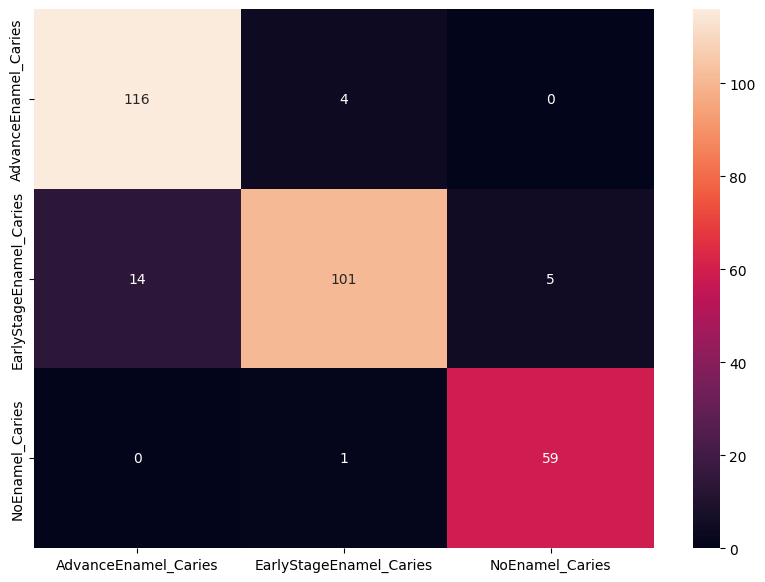

In [24]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']],
                  columns = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

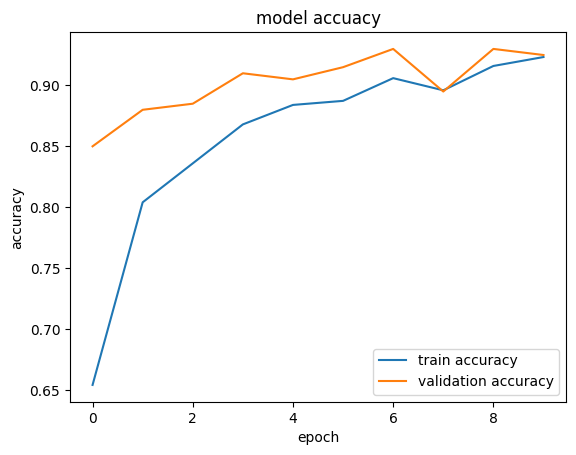

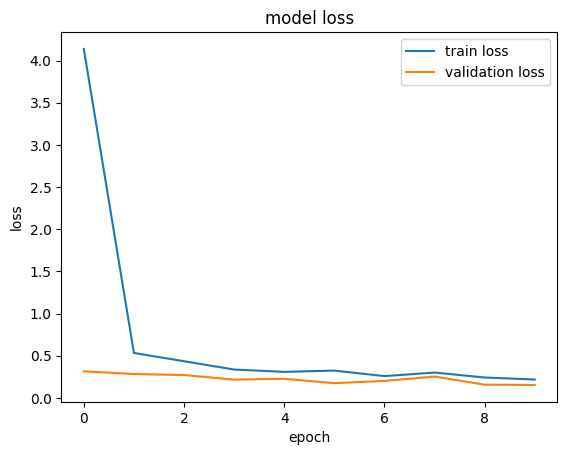

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# **ResNet50**

In [26]:
ResNet50 = tf.keras.applications.ResNet50(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

94765736/94765736 [==============================] - 0s 0us/step


In [27]:
ResNet50.trainable = False

In [28]:
model = tf.keras.models.Sequential([
  ResNet50,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  #tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [29]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_2 (Dropout)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 1024)              102761472 
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dense_9 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 126875523 (483.99 MB)
Trainable params: 

In [30]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
47/47 [==============================] - 34s 593ms/step - loss: 4.2588 - accuracy: 0.3953 - val_loss: 1.2348 - val_accuracy: 0.2050
Epoch 2/10
47/47 [==============================] - 26s 545ms/step - loss: 1.1062 - accuracy: 0.4433 - val_loss: 1.0179 - val_accuracy: 0.4700
Epoch 3/10
47/47 [==============================] - 26s 544ms/step - loss: 1.0288 - accuracy: 0.4907 - val_loss: 0.9910 - val_accuracy: 0.4000
Epoch 4/10
47/47 [==============================] - 25s 538ms/step - loss: 1.0062 - accuracy: 0.4987 - val_loss: 0.8613 - val_accuracy: 0.6600
Epoch 5/10
47/47 [==============================] - 26s 543ms/step - loss: 0.9276 - accuracy: 0.5387 - val_loss: 0.8115 - val_accuracy: 0.6300
Epoch 6/10
47/47 [==============================] - 24s 520ms/step - loss: 0.9188 - accuracy: 0.5373 - val_loss: 0.7797 - val_accuracy: 0.6100
Epoch 7/10
47/47 [==============================] - 25s 525ms/step - loss: 0.9152 - accuracy: 0.5380 - val_loss: 0.7984 - val_accuracy: 0.6200

In [31]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

10/10 [==============================] - 3s 269ms/step - loss: 0.9380 - accuracy: 0.4667
Accuracy: 0.46666666865348816
Loss: 0.9379563331604004


In [32]:
test.class_indices

{'AdvanceEnamel_Caries': 0, 'EarlyStageEnamel_Caries': 1, 'NoEnamel_Caries': 2}

In [33]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

10/10 [==============================] - 3s 186ms/step
                         precision    recall  f1-score   support

   AdvanceEnamel_Caries       1.00      0.35      0.52       120
EarlyStageEnamel_Caries       0.36      0.37      0.36       120
        NoEnamel_Caries       0.40      0.90      0.55        60

               accuracy                           0.47       300
              macro avg       0.59      0.54      0.48       300
           weighted avg       0.62      0.47      0.46       300



<Axes: >

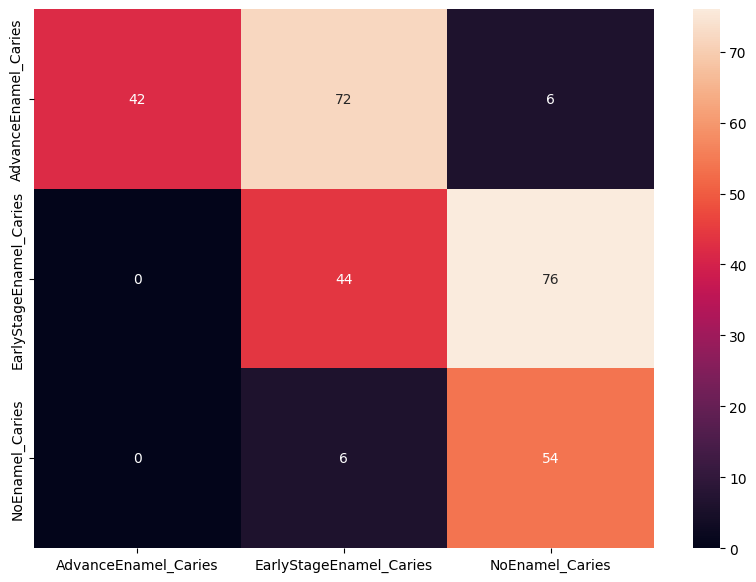

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']],
                  columns = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

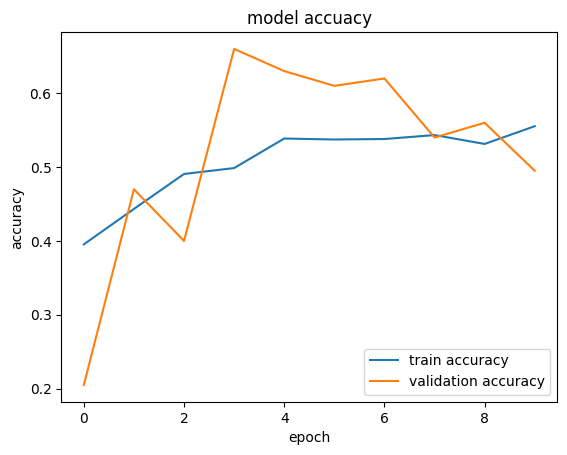

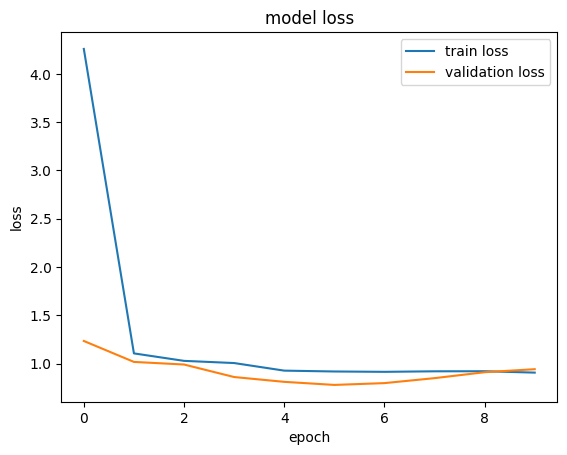

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# **VGG16**

In [36]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

58889256/58889256 [==============================] - 0s 0us/step


In [37]:
VGG16.trainable = False

In [38]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [39]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 1024)              25691136  
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dense_12 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 40932163 (156.14 MB)
Trainable params: 2

In [40]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
47/47 [==============================] - 42s 723ms/step - loss: 1.7766 - accuracy: 0.5560 - val_loss: 0.5943 - val_accuracy: 0.6850
Epoch 2/10
47/47 [==============================] - 25s 541ms/step - loss: 0.6576 - accuracy: 0.7107 - val_loss: 0.5951 - val_accuracy: 0.7350
Epoch 3/10
47/47 [==============================] - 25s 542ms/step - loss: 0.5909 - accuracy: 0.7393 - val_loss: 0.4301 - val_accuracy: 0.8300
Epoch 4/10
47/47 [==============================] - 25s 538ms/step - loss: 0.5513 - accuracy: 0.7660 - val_loss: 0.4251 - val_accuracy: 0.8550
Epoch 5/10
47/47 [==============================] - 25s 537ms/step - loss: 0.5824 - accuracy: 0.7613 - val_loss: 0.4237 - val_accuracy: 0.8200
Epoch 6/10
47/47 [==============================] - 25s 527ms/step - loss: 0.5317 - accuracy: 0.7620 - val_loss: 0.3621 - val_accuracy: 0.8650
Epoch 7/10
47/47 [==============================] - 25s 539ms/step - loss: 0.5202 - accuracy: 0.7753 - val_loss: 0.3765 - val_accuracy: 0.8550

In [41]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

10/10 [==============================] - 5s 482ms/step - loss: 0.4064 - accuracy: 0.8367
Accuracy: 0.8366666436195374
Loss: 0.40635740756988525


In [42]:
test.class_indices

{'AdvanceEnamel_Caries': 0, 'EarlyStageEnamel_Caries': 1, 'NoEnamel_Caries': 2}

In [43]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

10/10 [==============================] - 2s 139ms/step
                         precision    recall  f1-score   support

   AdvanceEnamel_Caries       0.98      0.79      0.88       120
EarlyStageEnamel_Caries       0.73      0.94      0.82       120
        NoEnamel_Caries       0.90      0.72      0.80        60

               accuracy                           0.84       300
              macro avg       0.87      0.82      0.83       300
           weighted avg       0.86      0.84      0.84       300



<Axes: >

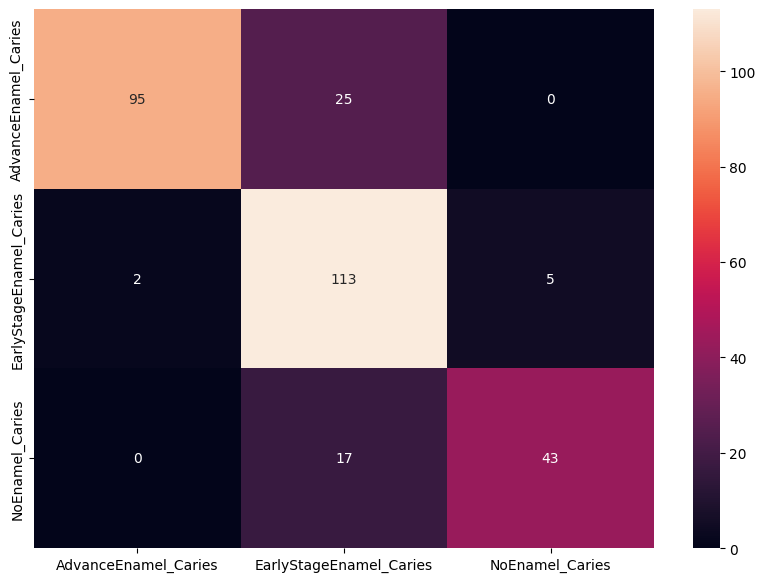

In [44]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']],
                  columns = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

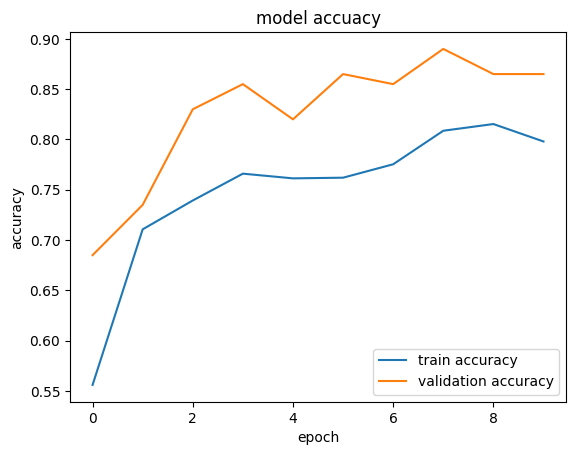

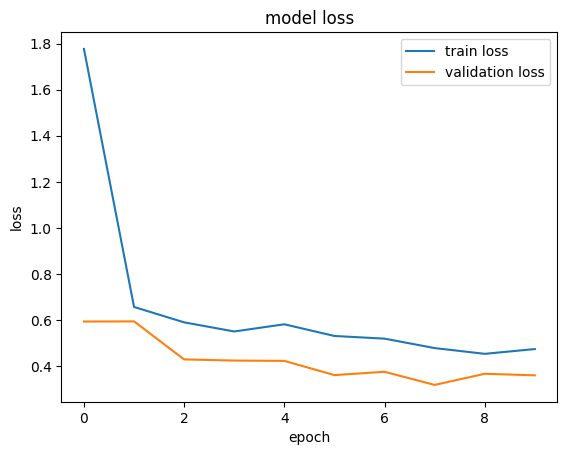

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

# **VGG19**

In [46]:
VGG19 = tf.keras.applications.VGG19(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
VGG19.trainable = False

In [47]:
model = tf.keras.models.Sequential([
  VGG19,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [48]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_4 (Dropout)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 1024)              25691136  
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dense_15 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 46241859 (176.40 MB)
Trainable params: 4

In [49]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 10
)

Epoch 1/10
47/47 [==============================] - 59s 863ms/step - loss: 2.5955 - accuracy: 0.3907 - val_loss: 1.0859 - val_accuracy: 0.4000
Epoch 2/10
47/47 [==============================] - 31s 665ms/step - loss: 1.0774 - accuracy: 0.4000 - val_loss: 1.0686 - val_accuracy: 0.4000
Epoch 3/10
47/47 [==============================] - 32s 683ms/step - loss: 1.0634 - accuracy: 0.4000 - val_loss: 1.0596 - val_accuracy: 0.4000
Epoch 4/10
47/47 [==============================] - 32s 668ms/step - loss: 1.0580 - accuracy: 0.4000 - val_loss: 1.0561 - val_accuracy: 0.4000
Epoch 5/10
47/47 [==============================] - 31s 655ms/step - loss: 1.0558 - accuracy: 0.4000 - val_loss: 1.0551 - val_accuracy: 0.4000
Epoch 6/10
47/47 [==============================] - 32s 672ms/step - loss: 1.0557 - accuracy: 0.4000 - val_loss: 1.0552 - val_accuracy: 0.4000
Epoch 7/10
47/47 [==============================] - 31s 650ms/step - loss: 1.0560 - accuracy: 0.4000 - val_loss: 1.0550 - val_accuracy: 0.4000

In [50]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

10/10 [==============================] - 2s 160ms/step - loss: 1.0550 - accuracy: 0.4000
Accuracy: 0.4000000059604645
Loss: 1.0549676418304443


In [51]:
test.class_indices

{'AdvanceEnamel_Caries': 0, 'EarlyStageEnamel_Caries': 1, 'NoEnamel_Caries': 2}

In [52]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

10/10 [==============================] - 2s 148ms/step
                         precision    recall  f1-score   support

   AdvanceEnamel_Caries       0.00      0.00      0.00       120
EarlyStageEnamel_Caries       0.40      1.00      0.57       120
        NoEnamel_Caries       0.00      0.00      0.00        60

               accuracy                           0.40       300
              macro avg       0.13      0.33      0.19       300
           weighted avg       0.16      0.40      0.23       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

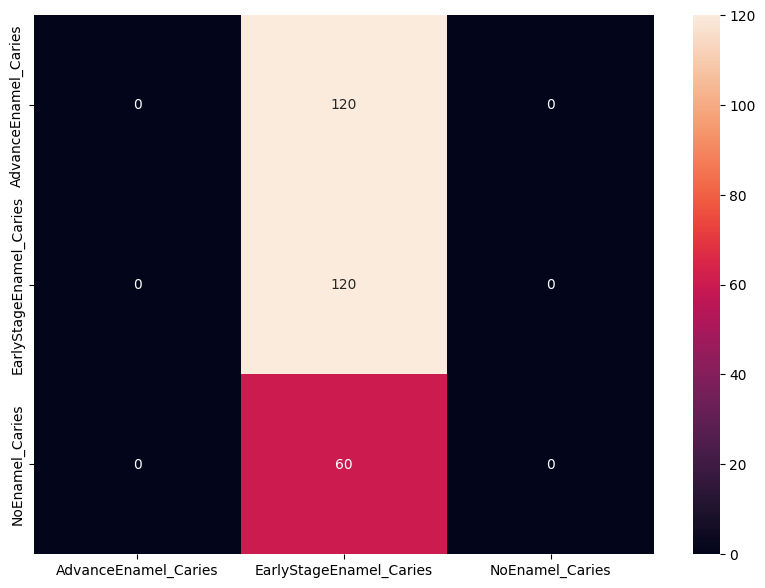

In [53]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']],
                  columns = [i for i in ['AdvanceEnamel_Caries', 'EarlyStageEnamel_Caries', 'NoEnamel_Caries']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

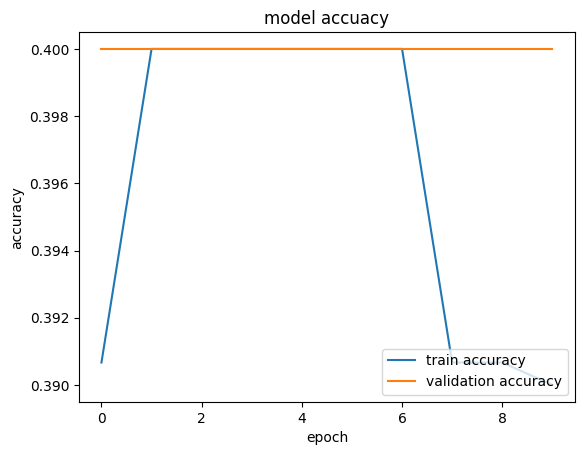

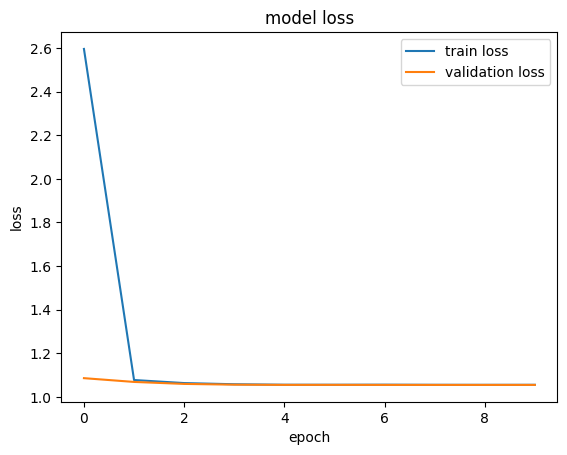

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()